In [1]:
# Start by loading in some basics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
# Read in the file, make it a dataframe and examine the data

with open('C:/Users/mdkhi/Documents/ultimate_challenge/ultimate_data_challenge.json', 'r') as read_file:
    data = json.load(read_file)
    
df = pd.DataFrame(data)

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [5]:
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [6]:
# OK, only 3 cities.  That's an easy split to run some comparisons on.

df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [7]:
# And only 2 phone types.  Again, an easy way to compare users.

pd.value_counts(df['signup_date'].values).sort_index()

2014-01-01    1737
2014-01-02    1004
2014-01-03    1213
2014-01-04    1485
2014-01-05    1343
2014-01-06    1763
2014-01-07    1486
2014-01-08    1275
2014-01-09    1433
2014-01-10    2021
2014-01-11    2402
2014-01-12    1334
2014-01-13    1049
2014-01-14    1120
2014-01-15    1110
2014-01-16    1431
2014-01-17    2149
2014-01-18    2948
2014-01-19    2028
2014-01-20    1295
2014-01-21    1234
2014-01-22    1369
2014-01-23    1606
2014-01-24    2284
2014-01-25    2885
2014-01-26    1708
2014-01-27    1236
2014-01-28    1284
2014-01-29    1197
2014-01-30    1471
2014-01-31    2100
dtype: int64

In [8]:
# And just to verify, it appears all the users were signed up in Jan 2014.  All right, let's clean up the NaN's.
# There are many missing driver ratings, but the data accounts for around 80% of them.  There are only a handful
# of missing rider ratings and phone types.  For the ratings, I'll impute the means, and for the phones, I'll just
# drop the missing rows (400 out of 50000 is less than 1%).

df = df.fillna(df.mean())
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null object
phone                     49604 non-null object
signup_date               49604 non-null object
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [9]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000
mean,5.785418,4.777862,4.601482,1.074991,8.875314,2.277256,60.883832
std,5.669709,0.446220,0.565227,0.222666,19.989018,3.793300,37.086239
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.700000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [10]:
# That raised the 25% from 4.3 to 4.5 and lowered the 50% from 4.9 to 4.7.  That doesn't seem like much, but if some
# results look skewed, it might be worth rerunning calculations on just non-missing data.  So, let's look for some
# interesting trends.

# Define some retention categories
june_trip = df['last_trip_date'] > '2014-05-31'
wint_user = df['city'] == 'Winterfell'
asta_user = df['city'] == 'Astapor'
king_user = df['city'] == "King's Landing"
ip_user = df['phone'] == 'iPhone'
and_user = df['phone'] == 'Android'

num_retained = len(df[june_trip])
ult_black_retained = len(df[june_trip & df['ultimate_black_user']])
wint_retained = len(df[june_trip & wint_user])
asta_retained = len(df[june_trip & asta_user])
king_retained = len(df[june_trip & king_user])
ip_retained = len(df[june_trip & ip_user])
and_retained = len(df[june_trip & and_user])

print('Total number of users retained :',num_retained)
print('Total percent of users retained :',(num_retained/len(df)))
print('\nTotal Ultimate Black users retained :',ult_black_retained)
print('Percent Ultimate Black users retained :',(ult_black_retained/len(df[df['ultimate_black_user']])))
print('\nTotal users retained from Winterfell :',wint_retained)
print('Percent Winterfell users retained :',(wint_retained/len(df[wint_user])))
print('Total users retained from Astapor :',asta_retained)
print('Percent Astapor users retained :',(asta_retained/len(df[asta_user])))
print("Total users retained from King's Landing :",king_retained)
print("Percent King's Landing users retained :",(king_retained/len(df[king_user])))
print('\nTotal iPhone users retained :',ip_retained)
print('Percent iPhone users retained :',(ip_retained/len(df[ip_user])))
print('Total Android users retained :',and_retained)
print('Percent Android users retained :',(and_retained/len(df[and_user])))

Total number of users retained : 18671
Total percent of users retained : 0.37640109668575117

Total Ultimate Black users retained : 9410
Percent Ultimate Black users retained : 0.5055877928218354

Total users retained from Winterfell : 8148
Percent Winterfell users retained : 0.3523459459459459
Total users retained from Astapor : 4198
Percent Astapor users retained : 0.25577286297447144
Total users retained from King's Landing : 6325
Percent King's Landing users retained : 0.628352871051063

Total iPhone users retained : 15525
Percent iPhone users retained : 0.44893297090972184
Total Android users retained : 3146
Percent Android users retained : 0.2094261749434163


So, assuming Ultimate Black is a program we're interested in, roughly half the retained users participated in that program.  And the percent of retention is clearly higher for Ultimate Black users.  Winterfell's retained users appear to be the most numerous and closest to average retention.  Astapor's retained users are the least numerous and have the lowest retention rate as well.  King's Landing's retained users are mid-range in number, but have the highest retention percentage.  IPhone users outnumber Android users roughly 5 to 1, and have more than double the retention rate.  So, for a preliminary guess, users from King's Landing who use iPhones and participate in the Ultimate Black program may be the best bet for retaining.

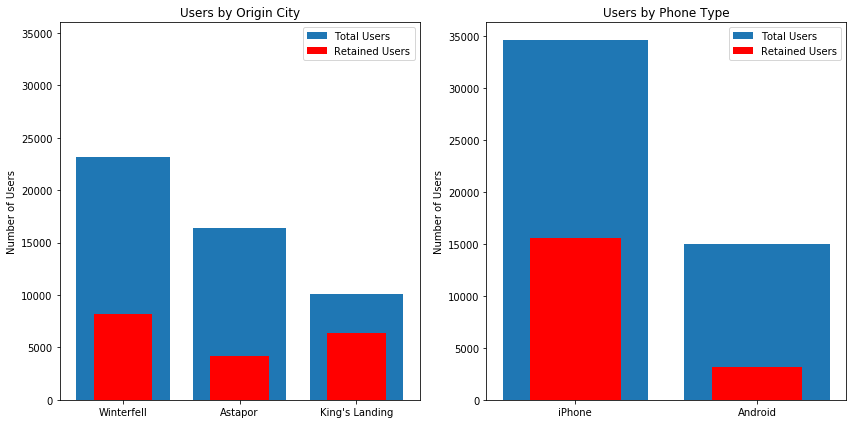

In [11]:
city_users = (len(df[wint_user]), len(df[asta_user]), len(df[king_user]))
city_ret_users = (wint_retained, asta_retained, king_retained)

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.bar(np.arange(3), city_users, label='Total Users')
plt.bar(np.arange(3), city_ret_users, color='red', label='Retained Users', width=0.5)
plt.title('Users by Origin City')
plt.ylabel('Number of Users')
plt.legend()
plt.ylim((0,36000))
plt.xticks(np.arange(3),('Winterfell','Astapor',"King's Landing"))

phone_users = (len(df[ip_user]), len(df[and_user]))
phone_ret_users = (ip_retained, and_retained)

plt.subplot(122)
plt.bar(np.arange(2), phone_users, label='Total Users')
plt.bar(np.arange(2), phone_ret_users, color='red', label='Retained Users', width=0.5)
plt.title('Users by Phone Type')
plt.ylabel('Number of Users')
plt.legend()
plt.xticks(np.arange(2),('iPhone','Android'))

plt.tight_layout()
plt.show()

In [14]:
# Now, let's start building a model.  I'll use a random forest classifier, because I've had success with that in the past.
# In that, I've been told the OOB score is a more accurate score than the R^2 score, so I'll use OOB.  I also need to create
# a column with retention as a 1 or 0, to train and score the classifier.  Also, the classifier won't take the string date
# columns, so I can work without those, and I'll create dummy columns to quantify the city and phone values.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

customer_retained = june_trip.astype(int)

df_test = df.drop(['last_trip_date','signup_date'], axis = 1)
df_test = pd.get_dummies(df_test,columns=['city'])
df_test = pd.get_dummies(df_test,columns=['phone'])

df_test.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0,0,1,1,0


In [15]:
# Stratifying the train test split will ensure a similar amount of retained customers in the training and test splits
X_train, X_test, y_train, y_test = train_test_split(df_test, customer_retained, stratify = customer_retained)

features = ['sqrt', 'log2', None]
estimators = [10, 25, 50, 75, 100, 250, 500, 750, 1000]

for feature in features:
    for estimator in estimators:
        clf = RandomForestClassifier(n_estimators = estimator, max_features = feature, oob_score = True)
        clf.fit(X_train, y_train)
        
        print('OOB score for {} max features tree with {} estimators is: {}'.format(feature, estimator, clf.oob_score_))
    print('\n')

C:\Users\mdkhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\mdkhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


OOB score for sqrt max features tree with 10 estimators is: 0.7302905679649491
OOB score for sqrt max features tree with 25 estimators is: 0.7464989382576674
OOB score for sqrt max features tree with 50 estimators is: 0.7532457059914524
OOB score for sqrt max features tree with 75 estimators is: 0.7558261430529796
OOB score for sqrt max features tree with 100 estimators is: 0.7575733139800553
OOB score for sqrt max features tree with 250 estimators is: 0.7576270730855038
OOB score for sqrt max features tree with 500 estimators is: 0.7576270730855038
OOB score for sqrt max features tree with 750 estimators is: 0.7582453027981615
OOB score for sqrt max features tree with 1000 estimators is: 0.7579496277181947




C:\Users\mdkhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\mdkhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


OOB score for log2 max features tree with 10 estimators is: 0.7292422654087036
OOB score for log2 max features tree with 25 estimators is: 0.748998736661022
OOB score for log2 max features tree with 50 estimators is: 0.7527081149369674
OOB score for log2 max features tree with 75 estimators is: 0.7546165631803887
OOB score for log2 max features tree with 100 estimators is: 0.7555842270784614
OOB score for log2 max features tree with 250 estimators is: 0.7570088433728462
OOB score for log2 max features tree with 500 estimators is: 0.757761470849125
OOB score for log2 max features tree with 750 estimators is: 0.7580033868236432
OOB score for log2 max features tree with 1000 estimators is: 0.7575464344273312




C:\Users\mdkhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\mdkhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


OOB score for None max features tree with 10 estimators is: 0.7255597666854824
OOB score for None max features tree with 25 estimators is: 0.7471440475230492
OOB score for None max features tree with 50 estimators is: 0.7536757788350402
OOB score for None max features tree with 75 estimators is: 0.7537564174932129
OOB score for None max features tree with 100 estimators is: 0.7544552858640432
OOB score for None max features tree with 250 estimators is: 0.7573851571109856
OOB score for None max features tree with 500 estimators is: 0.7586216165363009
OOB score for None max features tree with 750 estimators is: 0.75829906190361
OOB score for None max features tree with 1000 estimators is: 0.7591592075907857




In [23]:
# There are similar results between all 3 max features.  For the sake of runtime, I'll work with 250 estimators and
# sqrt max features, since that score was within 0.0015 of the best score, but ran quite a bit faster.

# This will generate a good report to judge the classifier with
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators = 250, max_features = 'sqrt', oob_score = True)
clf.fit(X_train, y_train)

print('Classification Report :')
print(classification_report(y_test, clf.predict(X_test)))

Classification Report :
             precision    recall  f1-score   support

          0       0.80      0.81      0.80      7733
          1       0.68      0.66      0.67      4668

avg / total       0.75      0.75      0.75     12401



In [26]:
# The report shows the classifier does a decent job of predicting non-retained customers, and a slightly worse job of
# predicting retained customers.

feat_imp = pd.DataFrame({'Features': df_test.columns, 'Estimated Coefficients': np.reshape(clf.feature_importances_,13)})
feat_imp = feat_imp.reindex(feat_imp['Estimated Coefficients'].sort_values(ascending=False).index)
print('Feature Importances :')
print(feat_imp)

Feature Importances :
                  Features  Estimated Coefficients
0                 avg_dist                0.299088
7              weekday_pct                0.133394
1     avg_rating_by_driver                0.113528
4                surge_pct                0.083539
2     avg_rating_of_driver                0.081823
5   trips_in_first_30_days                0.081420
3                avg_surge                0.065523
9      city_King's Landing                0.046394
6      ultimate_black_user                0.031673
12            phone_iPhone                0.020234
11           phone_Android                0.017260
8             city_Astapor                0.015642
10         city_Winterfell                0.010483


In [29]:
# According to these, the average distance travelled is the most important feature for retaining customers, followed by
# percent of weekday use and rider rating.  The other features worth looking at are the percent of trips taken with surge
# pricing, the driver rating and the number of trips in the first 30 days.  So, let's see if we can identify the best
# average distance and percent of weekday use.

df_ret = df[june_trip]

df_ret.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
13,3.04,5.0,4.0,1.38,King's Landing,2014-06-08,iPhone,2014-01-29,50.0,0,False,50.0
16,10.86,3.0,5.0,1.00,King's Landing,2014-06-28,Android,2014-01-11,0.0,1,True,50.0


In [30]:
df_ret.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000
mean,5.113930,4.762740,4.593778,1.073834,9.165615,3.304804,61.344208
std,4.617779,0.328707,0.518625,0.162905,15.599652,4.985057,29.512875
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.560000,4.700000,4.400000,1.000000,0.000000,0.000000,44.400000
50%,3.730000,4.800000,4.700000,1.000000,0.000000,2.000000,64.300000
75%,5.890000,5.000000,5.000000,1.090000,13.300000,4.000000,84.600000
max,160.960000,5.000000,5.000000,4.500000,100.000000,125.000000,100.000000


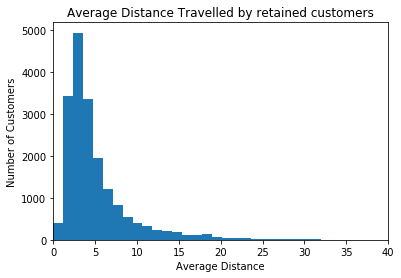

In [35]:
plt.hist(df_ret['avg_dist'], bins = int(np.sqrt(len(df_ret))))
plt.title('Average Distance Travelled by Retained Customers')
plt.xlabel('Average Distance')
plt.ylabel('Number of Customers')
plt.xlim((0,40))
plt.show()

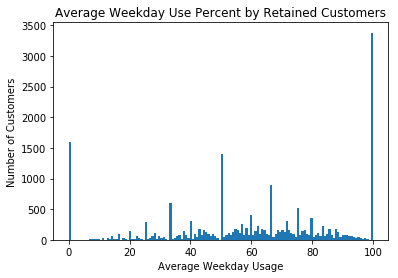

In [38]:
plt.hist(df_ret['weekday_pct'], bins = int(np.sqrt(len(df_ret))))
plt.title('Average Weekday Use Percent by Retained Customers')
plt.xlabel('Average Weekday Usage')
plt.ylabel('Number of Customers')
plt.show()

According to the summary information and the top graph, 75% of retained customers travel less than 6 miles per use, so targeting short trip customers seems to be a good idea.  The weekday usage is less clear, with the mean use around 60%.  75% of retained customers show weekday use up to 85%, and the graph show the largest group of customers use the service only on weekdays, with 2 smaller groups using only weekend service, and split evenly between both, so targeting weekday users may also be favorable.  Including the earlier visualizations, Ultimate's most retained customers appear to be mainly weekday users who travel short distances, especially those who originated in King's Landing, use iPhones, and participate in the Ultimate Black program.